Naive Bayes Theorem GaussianNB Sample Project IN Mchine Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sns

In [2]:
#load the dataset
df=pd.read_csv("C:\\Users\\ssure\\OneDrive\\Desktop\\all python\\datasets\\naive bayes thream dataset.csv")
df

,country,Code,Year,Extreme cold,Moderate cold,Moderate heat,Extreme heat
0,Australia,AUS,2015,0.67,5.82,0.14,0.32
1,Brazil,BRA,2015,0.49,2.34,0.48,0.22
2,Canada,CAN,2015,0.25,4.21,0.27,0.26
3,China,CHN,2015,1.06,9.31,0.24,0.40
4,Italy,ITA,2015,0.85,8.51,0.94,0.67
5,Japan,JPN,2015,0.77,9.04,0.13,0.18
6,South Korea,KOR,2015,0.35,6.58,0.10,0.21
7,Spain,ESP,2015,0.71,4.75,0.54,0.52
8,Sweden,SWE,2015,0.27,3.44,0.03,0.15
9,Taiwan,TWN,2015,0.71,3.19,0.60,0.25


In [3]:
#display the frist five rows of the dataset
df.head()

,country,Code,Year,Extreme cold,Moderate cold,Moderate heat,Extreme heat
0,Australia,AUS,2015,0.67,5.82,0.14,0.32
1,Brazil,BRA,2015,0.49,2.34,0.48,0.22
2,Canada,CAN,2015,0.25,4.21,0.27,0.26
3,China,CHN,2015,1.06,9.31,0.24,0.40
4,Italy,ITA,2015,0.85,8.51,0.94,0.67


In [20]:
print("information about the dataset")
print("<<<<<<<<<<<")
df.info()

information about the dataset
<<<<<<<<<<<
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Extreme cold        14 non-null     float64
 1   Moderate cold       14 non-null     float64
 2   Moderate heat       14 non-null     float64
 3   Extreme_heat_label  14 non-null     int64  
dtypes: float64(3), int64(1)
memory usage: 580.0 bytes


In [18]:
print("describe")
df.describe()

describe


,Extreme cold,Moderate cold,Moderate heat,Extreme_heat_label
count,14.000000,14.000000,14.000000,14.000000
mean,0.607857,5.627143,0.310000,0.285714
std,0.240806,2.417413,0.260118,0.468807
min,0.250000,2.170000,0.030000,0.000000
25%,0.442500,3.632500,0.132500,0.000000
50%,0.650000,5.485000,0.215000,0.000000
75%,0.755000,7.377500,0.477500,0.750000
max,1.060000,9.310000,0.940000,1.000000


In [4]:
# check the missing values
print("missing values")
df.isnull().sum()

missing values


country          0
Code             0
Year             0
Extreme cold     0
Moderate cold    0
Moderate heat    0
Extreme heat     0
dtype: int64

In [5]:
df=df.drop(['country','Code','Year'],axis=1)


In [6]:
# Create target variable based on 'Extreme heat'
extreme_heat_avg = df['Extreme heat'].mean()
df['Extreme_heat_label'] = df['Extreme heat'].apply(lambda x: 1 if x > extreme_heat_avg else 0)
df = df.drop('Extreme heat', axis=1)

In [7]:
df.head()

,Extreme cold,Moderate cold,Moderate heat,Extreme_heat_label
0,0.67,5.82,0.14,1
1,0.49,2.34,0.48,0
2,0.25,4.21,0.27,0
3,1.06,9.31,0.24,1
4,0.85,8.51,0.94,1


In [8]:


# Define features and target variable
X = df.drop('Extreme_heat_label', axis=1)
y = df['Extreme_heat_label']

In [9]:

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [10]:
# Initialize and train the model
gnb = GaussianNB()
gnb.fit(X_train, y_train)


GaussianNB()

In [11]:
# Make predictions
y_pred = gnb.predict(X_test)


In [12]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")



Accuracy: 0.20


In [13]:
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)



Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.00      0.00      0.00         1

    accuracy                           0.20         5
   macro avg       0.25      0.12      0.17         5
weighted avg       0.40      0.20      0.27         5



In [14]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)



Confusion Matrix:
[[1 3]
 [1 0]]


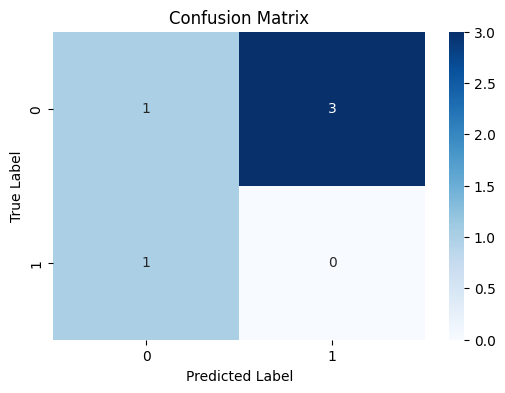

In [15]:

# Visualize confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



Let's walk through the process of applying a Naive Bayes classifier to your dataset using scikit-learn. Here's a step-by-step guide:

1. Load the Dataset
First, we need to load your dataset and inspect it.

2. Explore and Preprocess the Data
Check for any missing values.
Handle any categorical data.
Split the dataset into features and labels.
3. Split the Data into Training and Testing Sets
Split your dataset into a training set and a testing set to evaluate the model.
4. Train a Naive Bayes Model
Choose the appropriate Naive Bayes algorithm (Gaussian, Multinomial, or Bernoulli).
Train the model on the training data.
5. Evaluate the Model
Predict the labels for the test set.
Evaluate the model using metrics like accuracy, precision, recall, and F1-score.
6. Interpret the Results
Analyze the results to understand the model's performance.
I'll start by loading and exploring your dataset. Let's proceed with that.

Your dataset has 14 entries and 7 columns:

country: The name of the country (object).
Code: The country code (object).
Year: The year of the data (int64).
Extreme cold, Moderate cold, Moderate heat, Extreme heat: These are float64 columns, likely representing some form of temperature-related data.
Next Steps:
Feature Selection: We'll drop the country and Code columns since they're categorical and likely not useful in this context.
Label Creation: Decide on what the labels (target) will be for the classification.
Splitting Data: Split the data into features and labels, then into training and testing sets.
Model Training: Train a Naive Bayes model on this data.
Would you like to classify based on a combination of the temperature columns (e.g., predicting if a year had extreme heat), or do you have a specific label in mind? ​

Sure, let's write a step-by-step code to apply a Naive Bayes classifier to your dataset using scikit-learn. We'll go through the following steps:

Import Necessary Libraries
Load the Dataset
Explore and Preprocess the Data
Split the Data into Training and Testing Sets
Train the Naive Bayes Model
Make Predictions
Evaluate the Model
Interpret the Results

# Step 1: Import Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Step 2: Load the Dataset
# Replace 'your_dataset.csv' with the path to your actual dataset file
file_path = 'naive_bayes_thream_dataset.csv'
df = pd.read_csv(file_path)


# Step 3: Explore and Preprocess the Data

# Display the first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Since 'country' and 'Code' are categorical and may not be useful for modeling,
# we'll drop them. We'll also drop 'Year' if it's not relevant.
df = df.drop(['country', 'Code', 'Year'], axis=1)

# For the purpose of classification, let's create a target variable.
# We'll classify whether 'Extreme heat' is above the average value.

# Calculate the average of 'Extreme heat'
extreme_heat_avg = df['Extreme heat'].mean()

# Create target variable
df['Extreme_heat_label'] = df['Extreme heat'].apply(lambda x: 1 if x > extreme_heat_avg else 0)

# Drop the 'Extreme heat' column as it's now represented by the label
df = df.drop('Extreme heat', axis=1)

print("\nProcessed dataset:")
print(df.head())


# Step 4: Split the Data into Training and Testing Sets

# Define features and target variable
X = df.drop('Extreme_heat_label', axis=1)
y = df['Extreme_heat_label']

# Split the dataset into training and testing sets
# Using test size of 30% and random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Step 5: Train the Naive Bayes Model

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)




# Step 6: Make Predictions

# Predict on the test set
y_pred = gnb.predict(X_test)



# Step 7: Evaluate the Model

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Step 8: Interpret the Results

# Since the dataset is very small, the model's performance may not be very reliable.
# However, this serves as a demonstration of how to implement a Naive Bayes classifier.



# all steps

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'naive_bayes_thream_dataset.csv'
df = pd.read_csv(file_path)

# Display the first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Drop unnecessary columns
df = df.drop(['country', 'Code', 'Year'], axis=1)

# Create target variable based on 'Extreme heat'
extreme_heat_avg = df['Extreme heat'].mean()
df['Extreme_heat_label'] = df['Extreme heat'].apply(lambda x: 1 if x > extreme_heat_avg else 0)
df = df.drop('Extreme heat', axis=1)

print("\nProcessed dataset:")
print(df.head())

# Define features and target variable
X = df.drop('Extreme_heat_label', axis=1)
y = df['Extreme_heat_label']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions
y_pred = gnb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

